![](https://image-1256668828.cos.ap-shanghai.myqcloud.com/data_01.png)

## 本周摘要

- 优化项目二的时间计算自定义函数
- 优化用户交互自定义函数
- 可视化和数据分析入门章节预告

>- ### `鉴于部分同学们咨询项目二无从下手，我先回顾下上节的内容。`

>- 开始录屏

- ` 讲师个人主页：` www.zhang-ran.com

> 代码优化

In [143]:
# 查看当前文件路径

import os
cwd = os.getcwd()
print(cwd)

/Users/Ran/Desktop/DA入门课件ALL


> 需要单独一个单元格的notebook来生成 .py 脚本

In [144]:
# 优化时间

import math
import pandas as pd
import time
import numpy as np

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def get_filters():
    city_list = ['chicago','new york city','washington']
    month_list = ['all','january','february','march','april','may','june']
    day_list = ['all','monday','tuesday','wednesday','thursday','friday','saturday','sunday']
      
    while True:
        city = input('Q1/3:which city do you want to analyst?(chicago,new york city or washington)\n')
        if city in city_list:
            break
        else:
            print('please ensure your input is one of the examples!') 
    while True:
        month = input('Q2/3:which month do you want to analyst?(all,january, february, ... , june)\n')
        if month in month_list:
            break
        else:
            print('please ensure your input is one of the examples!')   
    while True:
        day = input('Q3/3:which day do you want to analyst?(all, monday, tuesday, ... sunday)\n')
        if day in day_list:
            break
        else:
            print('please ensure your input is one of the examples!')   
  
    print('-'*40)
    return (city, month, day)

def load_data(city, month, day):

    df = pd.read_csv(CITY_DATA[city])
    print('analyzing --- ', city)
    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name

    if month != 'all':
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1
        df = df[df['month'] == month]
    if day != 'all':
        df = df[df['day_of_week'] == day.title()]

    return df

# 优化时间自定义函数

def changeTime(allTime):

    # 定义一天、一小时、一分钟的秒数
    day = 24*60*60
    hour = 60*60
    min = 60
    
    # 小于60s时，利用 math.ceil 函数向上取整
    if allTime <60:        
        return ("%d sec(s)"%math.ceil(allTime))
    
    # 利用模作 divmod 函数，获取模和余数的元组，将为天，将余数继续进行函数 
    elif  allTime > day:
        days = divmod(allTime, day) 
        return ("%d day(s), %s"%(int(days[0]), changeTime(days[1])))
    
    elif allTime > hour:
        hours = divmod(allTime, hour)
        return ('%d hour(s), %s'%(int(hours[0]),changeTime(hours[1])))
    else:
        mins = divmod(allTime, min)
        return ("%d min(s), %d sec(s)"%(int(mins[0]),math.ceil(mins[1])))
    
def trip_duration_stats(df):
    
    print('\nCalculating Trip Duration...\n')

    total_duration = df['Trip Duration'].sum()
    mean_duration = df['Trip Duration'].mean()

    #利用format进行格式化输出，调用changeTime函数
    print('The total travel time is around {} .'.format(changeTime(total_duration)))
    print('The mean of travel time is around {} .'.format(changeTime(mean_duration)))
    print('-'*40)

def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        trip_duration_stats(df)
        break

if __name__ == "__main__":
	main()

Q1/3:which city do you want to analyst?(chicago,new york city or washington)
chicago
Q2/3:which month do you want to analyst?(all,january, february, ... , june)
all
Q3/3:which day do you want to analyst?(all, monday, tuesday, ... sunday)
all
----------------------------------------
analyzing ---  chicago

Calculating Trip Duration...

The total travel time is around 3250 day(s), 19 hour(s), 56 min(s), 27 sec(s) .
The mean of travel time is around 15 min(s), 37 sec(s) .
----------------------------------------


In [ ]:
# 调整交互方式

import time
import pandas as pd
import numpy as np

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

months = ['All', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] 
days = ['All', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

def get_filters():

    print('Hello! Let\'s explore some US bikeshare data!')
    
    while True:
        input_city_number = input('\n[Please choose city number]\n1-chicago\n2-new york city\n3-washington\nYour choice is : ')
        if input_city_number == '1' :
            city = 'chicago'
            break
        elif input_city_number == '2' :
            city = 'new york city'
            break
        elif input_city_number == '3' :
            city = 'washington'
            break
        else :
            print('\nPlease select a number from 1 to 3 !\n')
        
    while True:
        try :
            input_month_number = int(input('\n[Please choose month number]\n0-All\n1-Jan\n2-Feb\n3-Mar\n4-Apr\n5-May\n6-Jun\nYour choice is : '))
            if int(input_month_number) <=6 and int(input_month_number) >=0 :
                month = months[input_month_number]
                break
            else :
                print("[Hint] Oops! Please input a valid number from 0 to 6 ! Try again.")
        except ValueError:
            print("[Hint] Oops! Please input a number of choice ! Try again.")
        
    while True:
        try :
            input_day_number = int(input('\n[Please choose month number]\n0-All\n1-Mon\n2-Tue\n3-Wed\n4-Thur\n5-Fri\n6-Sat\n7-Sun\nYour choice is : '))
            if input_day_number <=6 and input_day_number >=0 :
                day = days[input_day_number]
                break
            else :
                print("[Hint] Oops! Please input a valid number from 0 to 7 ! Try again.")
        except ValueError:
            print("[Hint] Oops! Please input a number of choice ! Try again.")
        
    print('-'*40)
    return city, month, day

def load_data(city, month, day):

    df = pd.read_csv(CITY_DATA[city])

    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.dayofweek

    if month != 'All':
        month_num = months.index(month)
        df = df[df['month'] == month_num]

    if day != 'All':
        day_num = days.index(day) 
        df = df[df['day_of_week'] == (day_num-1)]
        
    print('Based on your choice, the data set is successful loaded !')
    print('Data set parameters: City- %s; Month- %s; Day of week- %s.'%(city,month,day))
    print('-'*40) 

    return df

def time_stats(df):

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    popular_month = df['month'].mode()[0]
    print('\nMost common month is : %s\n'% months[popular_month])

    popular_dayofweek = df['day_of_week'].mode()[0]
    print('\nMost common day is : %s\n'%days[popular_dayofweek+1])

    df['hour'] = df['Start Time'].dt.hour
    popular_hour = df['hour'].mode()[0]
    print('\nMost common start hour is : %d h\n'%popular_hour)
    
    print("\nThis took %.5f seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    popular_start_station = df['Start Station'].mode()[0]
    print('\nMost commonly start station is : %s\n'%popular_start_station)

    popular_end_station = df['End Station'].mode()[0]
    print('\nMost commonly end station is : %s\n'%popular_end_station)

    df['comb_stations'] = df['Start Station'] + '>'+ df['End Station']
    popular_comb_stations = df['comb_stations'].mode()[0]
    print('\nMost frequent combination of start & end stations is : %s\n'%popular_comb_stations)

    print("\nThis took %.5f seconds." % (time.time() - start_time))
    print('-'*40)

def trip_duration_stats(df):

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    time_total = df['Trip Duration'].sum()
    print('\nTotal travel time : %.3f seconds (≈ %d minutes)\n'%(time_total,time_total/60))

    time_mean = df['Trip Duration'].mean()
    print('\nMean travel time : %.3f seconds (≈ %d minutes)\n'%(time_mean,time_mean/60))

    print("\nThis took %.5f seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df,city):
    
    print('\nCalculating User Stats...\n')
    
    if city == 'washington' :
        print('\n[Hint] Sorry, No user data in washington ! Please try another city .\n')
    else :
        start_time = time.time()
        print(df['User Type'].value_counts())
        print('\n\n')
        print(df['Gender'].value_counts())
        
        year_min = df['Birth Year'].min()
        year_max = df['Birth Year'].max()
        year_common = df['Birth Year'].mode()
        print('\n\n')
        print('Earliest year of birth : %s '% str(year_min)[0:4])
        print('Most recent year of birth : %s '% str(year_max)[0:4])
        print('Most common year of birth : %s '% str(year_common)[0:4])

        print("\nThis took %.5f seconds." % (time.time() - start_time))
        print('-'*40)

def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df,city)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break

if __name__ == "__main__":
	main()


Hello! Let's explore some US bikeshare data!

[Please choose city number]
1-chicago
2-new york city
3-washington
Your choice is : 1

[Please choose month number]
0-All
1-Jan
2-Feb
3-Mar
4-Apr
5-May
6-Jun
Your choice is : ttt
[Hint] Oops! Please input a number of choice ! Try again.

[Please choose month number]
0-All
1-Jan
2-Feb
3-Mar
4-Apr
5-May
6-Jun
Your choice is : 88
[Hint] Oops! Please input a valid number from 0 to 6 ! Try again.

[Please choose month number]
0-All
1-Jan
2-Feb
3-Mar
4-Apr
5-May
6-Jun
Your choice is : 1

[Please choose month number]
0-All
1-Mon
2-Tue
3-Wed
4-Thur
5-Fri
6-Sat
7-Sun
Your choice is : 1
----------------------------------------
Based on your choice, the data set is successful loaded !
Data set parameters: City- chicago; Month- Jan; Day of week- Mon.
----------------------------------------

Calculating The Most Frequent Times of Travel...


Most common month is : Jan


Most common day is : Mon


Most common start hour is : 17 h


This took 0.10464 sec

In [118]:
# 优化用户交互自定义函数

import time
import pandas as pd
import numpy as np

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def input_mod(input_print, error_print, enterable_list, get_value):
    while True:
        ret = input(input_print)
        ret = get_value(ret) 
        if ret in enterable_list:
            return ret
        else:
            print(error_print)
            
def get_filters():

    print('Hello! Let\'s explore some US bikeshare data!')
    
    city = input_mod('which city do you want to choose, chicago,washington,new york city?\n',
                    'please write certain city.',
                    CITY_DATA,lambda x: str.lower(x))
    
    months = ['all', 'january', 'february', 'march', 'april', 'may', 'june']
    month = input_mod('which month do you want to according to? such as all , january , february ,..., june\n',
                    'please write certain month.',
                    months,lambda x: str.lower(x))
 
    days = ['all', 'monday', 'tuesday','wednesday', 'thursday', 'friday', 'saturday', 'sunday']
    day = input_mod('which day do you want to according to? such as all, monday, tuesday, ... sunday\n',
                    'please write certain day name.',
                    days,lambda x: str.lower(x))

    print('-'*40)
    return city, month, day

def input_data(city):

    df = pd.read_csv(CITY_DATA[city])

    df['Start Time'] = pd.to_datetime(df['Start Time'])
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    df['hour'] = df['Start Time'].dt.hour
    
    return df

def load_data(city, month, day):

    df = input_data(city)

    if month != 'all':
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1
        df = df[df['month'] == month]

    if day != 'all':
        df = df[df['day_of_week'] == day.title()]

    return df

def time_stats(df):

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()
   
    popular_month = df['month'].mode()[0]
    print('Most Frequent Start Month:', popular_month)
    
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    popular_day = df['day_of_week'].mode()[0]
    print('Most Frequent Start Hour:', popular_day)

    popular_hour = df['hour'].mode()[0]
    print('Most Frequent Start Hour:', popular_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    start_station = df['Start Station'].mode()[0]
    print('The most commonly used start station is %s'% start_station)

    end_station = df['End Station'].mode()[0]
    print('The most commonly used end station is %s'% end_station)
    
    top = df.groupby(['Start Station', 'End Station']).size().idxmax()
    print("The most frequent combination of start station and end station trip is {} to {}".format(top[0], top[1]))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

def trip_duration_stats(df):

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    total_time = df['Trip Duration'].sum()
    print('Total travel time is %s' % total_time)

    mean_time = df['Trip Duration'].mean()
    print('Mean travel time is %s' % mean_time)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

def user_stats(df):

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    try:
               user_types = df['User Type'].value_counts()
               print(user_types)
               
               user_genders = df['Gender'].value_counts()
               print(user_genders)
               
               birth = df['Birth Year']
               earliest = birth.min()
               recent = birth.max()
               common = birth.mode()[0]
               print("user's birth earliest is %s.user's birth most recent is %s.user's birth most common is %s." %(earliest,recent,common))
    except:
               print("there is not find date list or other wrong")

    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()


Hello! Let's explore some US bikeshare data!
which city do you want to choose, chicago,washington,new york city?
chicago
which month do you want to according to? such as all , january , february ,..., june
all
which day do you want to according to? such as all, monday, tuesday, ... sunday
all
----------------------------------------

Calculating The Most Frequent Times of Travel...

Most Frequent Start Month: 6
Most Frequent Start Hour: Tuesday
Most Frequent Start Hour: 17

This took 0.16075396537780762 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

The most commonly used start station is Streeter Dr & Grand Ave
The most commonly used end station is Streeter Dr & Grand Ave
The most frequent combination of start station and end station trip is Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave

This took 0.3522682189941406 seconds.
----------------------------------------

Calculating Trip Duration...

Total travel time is 2808717

## 常见问题

In [2]:
for x in range(6):
    print(x)

0
1
2
3
4
5


In [3]:
[ x ** 2 for x in range(6)]

[0, 1, 4, 9, 16, 25]

In [120]:
test = (x ** 2 for x in range(6))
print(test)

<generator object <genexpr> at 0x1070fbbf8>


In [121]:
# 运行两次看看效果

list(test)

[0, 1, 4, 9, 16, 25]

>- 数据分析入门章节时间安排

`拓展部分`

In [4]:
import pandas as pd

In [5]:
# 列名

df = pd.read_csv('chicago.csv')
df.columns

Index(['Unnamed: 0', 'Start Time', 'End Time', 'Trip Duration',
       'Start Station', 'End Station', 'User Type', 'Gender', 'Birth Year'],
      dtype='object')

In [6]:
df['new_column_01'] = '手机'
df.head()

,Unnamed: 0,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year,new_column_01
0,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992.0,手机
1,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992.0,手机
2,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981.0,手机
3,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986.0,手机
4,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975.0,手机


> ### 操控数据小练习

In [142]:
# 新建数据列，把前万分之一行，偶数行加上 8848钛金手机，奇数行加上 iPhone X

# 思路 -> 测试 -> 报错 -> 调整

> 可能涉及
- [pandas获取行数](https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&tn=baidu&wd=pandas%20%E8%8E%B7%E5%8F%96%E8%A1%8C%E6%95%B0&oq=pandas%2520%25E8%258E%25B7%25E5%258F%2596%25E8%25A1%258C%25E6%2595%25B0&rsv_pq=c55fb9c70001f706&rsv_t=d55csrup3DdyHMigg8FpZrOP7COOKwVVAYMeLlYXHFnPVGAiVns23PKc%2BjM&rqlang=cn&rsv_enter=0&rsv_sug4=3319)
- [python判断奇数偶数](https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&tn=baidu&wd=python%E5%88%A4%E6%96%AD%E5%A5%87%E6%95%B0%E5%81%B6%E6%95%B0&oq=python%25E5%2588%25A4%25E6%2596%25AD%25E5%25A5%2587%25E6%2595%25B0%25E5%2581%25B6%25E6%2595%25B0&rsv_pq=82fb3cfb0002df15&rsv_t=7f1bQnLU9htkU9CMA%2BYkTd063BXUPHtIknhFxPLsdjx9Ff%2FNVBJngFZBTRk&rqlang=cn&rsv_enter=0)
- 新建列
- 浮点数改为整形
- 数据索引

`演示过程 ... `

- ### 先不要扯啦，我是有底线滴，下面👇是答案，先自己想想咯 ... 

In [126]:
'''
df['new_column_02'] = ''

for i in range(int(len(df)/10000)):
    if (i%2) == 0:
        df['new_column_02'][i] = '8848钛金手机'
    else:
        df['new_column_02'][i] = 'iPhone X'
        
df[int(len(df)/10000)-4:int(len(df)/10000)+1]
'''

"\ndf['new_column_02'] = ''\n\nfor i in range(int(len(df)/10000)):\n    if (i%2) == 0:\n        df['new_column_02'][i] = '8848钛金手机'\n    else:\n        df['new_column_02'][i] = 'iPhone X'\n        \ndf[int(len(df)/10000)-4:int(len(df)/10000)+1]\n"

In [127]:
# df = df.drop(['new_column_01', 'new_column_02'], axis=1)
# df.head()

In [128]:
# 选取前5行'Start Time', 'End Time'两列

df[:5][['Start Time', 'End Time']]

,Start Time,End Time
0,2017-06-23 15:09:32,2017-06-23 15:14:53
1,2017-05-25 18:19:03,2017-05-25 18:45:53
2,2017-01-04 08:27:49,2017-01-04 08:34:45
3,2017-03-06 13:49:38,2017-03-06 13:55:28
4,2017-01-17 14:53:07,2017-01-17 15:02:01


In [129]:
# 语法区别

df.loc[:5,['Start Time', 'End Time']]

,Start Time,End Time
0,2017-06-23 15:09:32,2017-06-23 15:14:53
1,2017-05-25 18:19:03,2017-05-25 18:45:53
2,2017-01-04 08:27:49,2017-01-04 08:34:45
3,2017-03-06 13:49:38,2017-03-06 13:55:28
4,2017-01-17 14:53:07,2017-01-17 15:02:01
5,2017-06-26 09:01:20,2017-06-26 09:11:06


In [130]:
# 语法区别

df.iloc[:5,[1,2]]

,Start Time,End Time
0,2017-06-23 15:09:32,2017-06-23 15:14:53
1,2017-05-25 18:19:03,2017-05-25 18:45:53
2,2017-01-04 08:27:49,2017-01-04 08:34:45
3,2017-03-06 13:49:38,2017-03-06 13:55:28
4,2017-01-17 14:53:07,2017-01-17 15:02:01


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 10 columns):
Unnamed: 0       300000 non-null int64
Start Time       300000 non-null object
End Time         300000 non-null object
Trip Duration    300000 non-null int64
Start Station    300000 non-null object
End Station      300000 non-null object
User Type        300000 non-null object
Gender           238948 non-null object
Birth Year       238981 non-null float64
new_column_01    300000 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [132]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238948 entries, 0 to 299999
Data columns (total 10 columns):
Unnamed: 0       238948 non-null int64
Start Time       238948 non-null object
End Time         238948 non-null object
Trip Duration    238948 non-null int64
Start Station    238948 non-null object
End Station      238948 non-null object
User Type        238948 non-null object
Gender           238948 non-null object
Birth Year       238948 non-null float64
new_column_01    238948 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 20.1+ MB


> ## 可视化预告，现在只是预习，下个章节会系统学习可视化

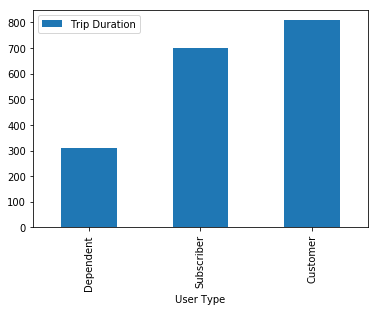

In [133]:
# User Type 可视化

df[['User Type', 'Trip Duration']].groupby('User Type').mean().sort_values(by = 'Trip Duration').plot(kind = 'bar');

In [134]:
df['Start Time'] = pd.to_datetime(df['Start Time'])

In [135]:
df['hour'] = df['Start Time'].dt.hour

In [136]:
df.hour.value_counts()[:5]

17    30613
8     23037
16    22616
18    19489
7     17898
Name: hour, dtype: int64

In [137]:
df.hour.value_counts()[:5].index

Int64Index([17, 8, 16, 18, 7], dtype='int64')

In [138]:
df[['User Type', 'Gender']].groupby(['User Type'])['Gender'].value_counts()

User Type   Gender
Customer    Male          82
            Female         9
Dependent   Male           1
Subscriber  Male      181107
            Female     57749
Name: Gender, dtype: int64

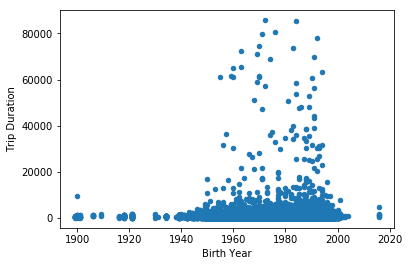

In [139]:
df[['Birth Year', 'Trip Duration']].plot.scatter(x = 'Birth Year', y = 'Trip Duration');

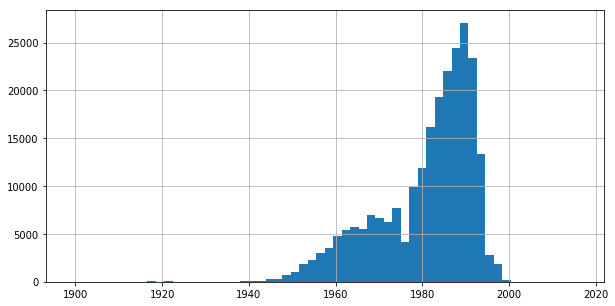

In [140]:
df['Birth Year'].hist(bins = 60, figsize = (10,5));

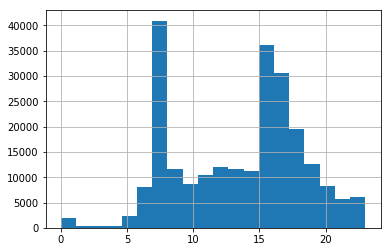

In [141]:
df.hour.hist(bins = 20);

> 参考资料

- Hist  https://community.modeanalytics.com/python/tutorial/python-histograms-boxplots-and-distributions/
- Boxplot  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.boxplot.html
- Bar  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.bar.html
- Line  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.line.html
- Barh  https://community.modeanalytics.com/python/tutorial/counting-and-plotting-in-python/